In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [0]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [5]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/Train_UQcUa52.zip


--2019-02-02 17:56:14--  https://datahack-prod.s3.amazonaws.com/train_file/Train_UQcUa52.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.28
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52075589 (50M) [application/zip]
Saving to: ‘Train_UQcUa52.zip’

Train_UQcUa52.zip   100%[===================>]  49.66M  10.5MB/s    in 5.8s    

2019-02-02 17:56:21 (8.51 MB/s) - ‘Train_UQcUa52.zip’ saved [52075589/52075589]



In [6]:
!unzip Train_UQcUa52.zip

Archive:  Train_UQcUa52.zip
   creating: Images/
   creating: Images/test/
 extracting: Images/test/49000.png   
 extracting: Images/test/49001.png   
 extracting: Images/test/49002.png   
 extracting: Images/test/49003.png   
 extracting: Images/test/49004.png   
 extracting: Images/test/49005.png   
 extracting: Images/test/49006.png   
 extracting: Images/test/49007.png   
 extracting: Images/test/49008.png   
 extracting: Images/test/49009.png   
 extracting: Images/test/49010.png   
 extracting: Images/test/49011.png   
 extracting: Images/test/49012.png   
 extracting: Images/test/49013.png   
 extracting: Images/test/49014.png   
 extracting: Images/test/49015.png   
 extracting: Images/test/49016.png   
 extracting: Images/test/49017.png   
 extracting: Images/test/49018.png   
 extracting: Images/test/49019.png   
 extracting: Images/test/49020.png   
 extracting: Images/test/49021.png   
 extracting: Images/test/49022.png   
 extracting: Images/test/49023.png   
 extracting: 

In [7]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/Test_fCbTej3.csv

--2019-02-02 18:01:59--  https://datahack-prod.s3.amazonaws.com/test_file/Test_fCbTej3.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.24
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210009 (205K) [text/plain]
Saving to: ‘Test_fCbTej3.csv’

Test_fCbTej3.csv    100%[===================>] 205.09K   294KB/s    in 0.7s    

2019-02-02 18:02:01 (294 KB/s) - ‘Test_fCbTej3.csv’ saved [210009/210009]



In [8]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/Sample_Submission_lxuyBuB.csv

--2019-02-02 18:02:04--  https://datahack-prod.s3.amazonaws.com/sample_submission/Sample_Submission_lxuyBuB.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.0
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16 [text/plain]
Saving to: ‘Sample_Submission_lxuyBuB.csv’

Sample_Submission_l 100%[===================>]      16  --.-KB/s    in 0s      

2019-02-02 18:02:05 (325 KB/s) - ‘Sample_Submission_lxuyBuB.csv’ saved [16/16]



In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('Test_fCbTej3.csv')

sample_submission = pd.read_csv('Sample_Submission_lxuyBuB.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [12]:
test.head(10)

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png
5,49005.png
6,49006.png
7,49007.png
8,49008.png
9,49009.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


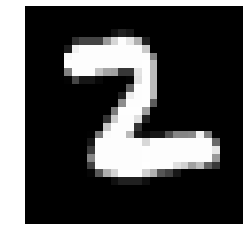

In [15]:
img_name = rng.choice(train.filename)
filepath = os.path.join('Images','train', img_name)
img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [16]:
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         16.,  34.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  47.,  67.,  67.,  67., 153.,
        214., 253., 230., 177.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [18]:
# For easier data manipulation, let’s store all our images as numpy arrays-----------------
temp= []
for img_name in train.filename:
    image_path = os.path.join('Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    image_path = os.path.join('Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


In [0]:
# to test the proper functioning of our model we create a validation set. Let’s take a split size of 70:30 for train set vs 
# validation set
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [20]:
train_x.shape

(34300, 28, 28)

In [0]:
# Now we define some helper functions, which we use later on, in our programs
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    batch_x = eval(dataset_name + '_x')[[batch_mask]].reshape(-1, input_num_units)
    batch_x = preproc(batch_x)
    
    if dataset_name == 'train':
        batch_y = eval(dataset_name).ix[batch_mask, 'label'].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [0]:
# Now comes the main part! Let us define our neural network architecture. We define a neural network with 3 layers;  
# input, hidden and output. The number of neurons in input and output are fixed, as the input is our 28 x 28 image and 
# the output is a 10 x 1 vector representing the class. We take 500 neurons in the hidden layer. This number can vary 
# according to need. We also assign values to remaining variables. 
### set all variables

# number of neurons in each layer--------------------------
input_num_units = 28*28
hidden_num_units = 500
output_num_units = 10

# define placeholders--------------------------------------
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining variables----------------------------------
epochs = 5
batch_size = 128
learning_rate = 0.01

### define weights and biases of the neural network (refer this article if you don't understand the terminologies)

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

In [0]:
# Now create our neural networks computational graph------------------------
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

In [24]:
# Also, we need to define cost of our neural network
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels= y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# And set the optimizer, i.e. our backpropogation algorithm. Here we use Adam, which is an efficient variant of Gradient Descent 
# algorithm. There are a number of other optimizers available in tensorflow 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [26]:
# After defining our neural network architecture, let’s initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [27]:
# Now let us create a session, and run our neural network in the session. We also validate our models accuracy on validation set 
# that we created
with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x.shape[0], 'train')
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            
            avg_cost += c / total_batch
            
        print("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
    
    print("\nTraining complete!")
    
    
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print("Validation Accuracy:", accuracy.eval({x: val_x.reshape(-1, input_num_units), y: dense_to_one_hot(val_y)}))
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: test_x.reshape(-1, input_num_units)})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Epoch: 1 cost = 9.00598
Epoch: 2 cost = 1.76293
Epoch: 3 cost = 0.91174
Epoch: 4 cost = 0.58219
Epoch: 5 cost = 0.45238

Training complete!
Validation Accuracy: 0.95455784


Prediction is:  8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


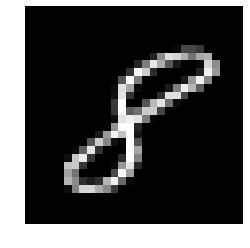

In [30]:
# To test our model with our own eyes, let’s visualize its predictions
img_name = rng.choice(test.filename)
filepath = os.path.join('Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [0]:
# Now let’s create a submission
sample_submission.filename = test.filename

sample_submission.label = pred

sample_submission.to_csv(os.path.join('sub01.csv'), index=False)

In [0]:
from google.colab import files
files.download('sub01.csv')